#### Projeto EcoTrash(Protótipo)

* Neste projeto temos como objetivo ter a conscientização da reciclagem para o meio ambiente dentro do tema abordado na extensão universitária aplicada.

Nesta parte da documentação se encontram a parte da programação do ArduínoIDE para configurar as portas lógicas e os componentes, e a parte da plotagem e manipulação de dados para nos mostrar uma interface gráfica coletada através do serial gravadas no Arduino.


> Programação ArduinoIDE:

* const int pinoChave0 = 7; // PINO DIGITAL UTILIZADO PELA CHAVE FIM DE CURSO
* const int pinoChave1 = 8;
* const int pinoChave2 = 9;
* const int corAzul = 0;
* const int corAmarelo = 1;
* const int corVerde = 2;

* void setup() {
  * pinMode(pinoChave0, INPUT_PULLUP);
  * pinMode(pinoChave1, INPUT_PULLUP);
  * pinMode(pinoChave2, INPUT_PULLUP); // DEFINE O PINO COMO ENTRADA COM RESISTOR PULLUP
  * Serial.begin(9600);                // INICIA A COMUNICAÇÃO SERIAL
* }

* void loop() {
  * if (digitalRead(pinoChave0) == LOW) { // SE A LEITURA DO PINO FOR IGUAL A LOW
    * Serial.println("fimdecurso_ligado 0");   // IMPRIME NO SERIAL "Chave acionada"
  * } else {                              // SENÃO
    * Serial.println("fimdecurso_desligado 0"); // IMPRIME NO SERIAL "Chave desacionada"
  * }
  * if (digitalRead(pinoChave1) == LOW) { // SE A LEITURA DO PINO FOR IGUAL A LOW
    * Serial.println("fimdecurso_ligado 1");   // IMPRIME NO SERIAL "Chave acionada"
  * } else {                              // SENÃO
    * Serial.println("fimdecurso_desligado 1"); // IMPRIME NO SERIAL "Chave desacionada"
  * }
  * if (digitalRead(pinoChave2) == LOW) { // SE A LEITURA DO PINO FOR IGUAL A LOW
    * Serial.println("fimdecurso_ligado 2");   // IMPRIME NO SERIAL "Chave acionada"
  * } else {                              // SENÃO
    * Serial.println("fimdecurso_desligado 2"); // IMPRIME NO SERIAL "Chave desacionada"
  * }

  * delay(1000); // DELAY PARA EVITAR LEITURAS RÁPIDAS DEMAIS
* }





> Neste código uso apenas as portas 7, 8 e 9 para fazer a conexão com os microswitch's as variaveis respectivas as cores são para simbolizar a saída do serial para plotagem em python, segue abaixo fotos modelos para conexão das portas:

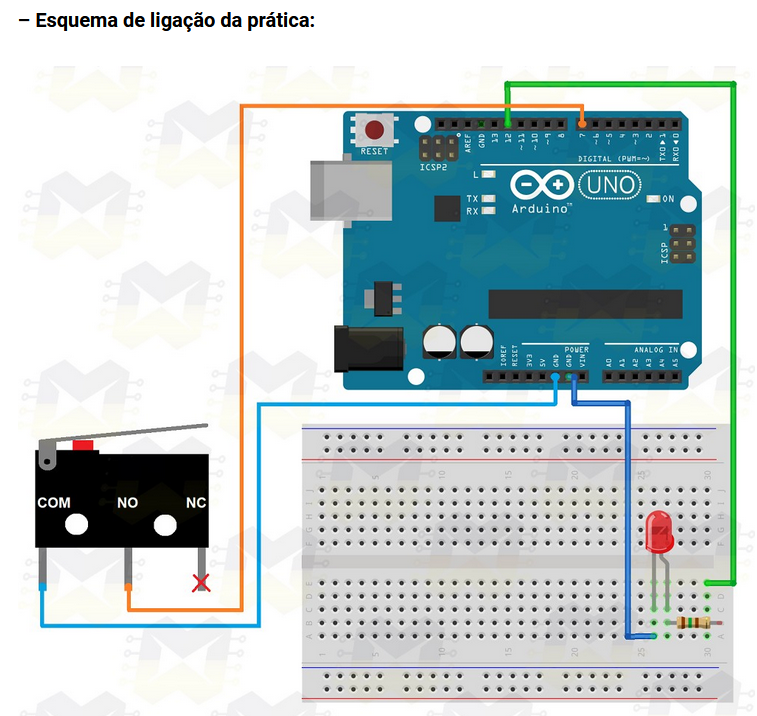

> Programação Python:

> Você deve baixar duas bibliotecas externas de Python: serial, e matplotlib usando o comando : *pip install nome da biblioteca*;
* Neste código estou usando o Python 3.7.3 = https://www.python.org/downloads/release/python-373/
* Baixe a versão respectiva a seu sistema operacional(MacOs, Linux ou Windows)
* Depois disso siga a programação abaixo para o código (lembre-se de rodar célula por célula)

In [2]:
import tkinter

In [1]:
import serial

In [2]:
pip install pyserial --upgrade

  Using cached pyserial-3.5-py2.py3-none-any.whl.metadata (1.6 kB)
Using cached pyserial-3.5-py2.py3-none-any.whl (90 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
try:
    import serial
except ImportError:
    print("Erro: O módulo 'serial' não está disponível. Certifique-se de que está instalado.")
    exit()


Conectado a COM8 com 9600 baud.


C:\Users\Roberto\AppData\Local\Temp\ipykernel_9080\357632114.py:72: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update_bar_chart, frames=None, interval=100)
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Roberto\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "c:\Users\Roberto\anaconda3\Lib\tkinter\__init__.py", line 861, in callit
    func(*args)
  File "c:\Users\Roberto\anaconda3\Lib\site-packages\matplotlib\backends\_backend_tk.py", line 145, in _on_timer
    super()._on_timer()
  File "c:\Users\Roberto\anaconda3\Lib\site-packages\matplotlib\backend_bases.py", line 1233, in _on_timer
    ret = func(*a

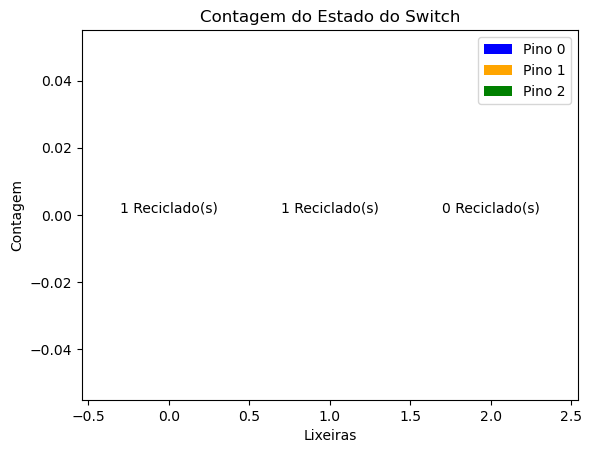

In [4]:
import serial
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.animation import FuncAnimation

# Configurações da porta serial
port = 'COM8'
baud_rate = 9600

# Inicializa a lista para armazenar os dados do gráfico
data = {'0': 0, '1': 0, '2': 0}  # Contagem para cada pino
cores = {'0': 'blue', '1': 'orange', '2': 'green'}  # Cores para cada pino
contagem_pressionado = {'0': 0, '1': 0, '2': 0}  # Contagem de vezes que cada pino foi pressionado

# Função para inicializar o gráfico de barras
def init_bar_chart():
    fig, ax = plt.subplots()
    ax.set_title('Contagem do Estado do Switch')
    ax.set_ylabel('Contagem')
    ax.set_xlabel('Pinos')
    return fig, ax

# Função para atualizar o gráfico com os dados mais recentes
def update_bar_chart(frame):
    line = ser.readline().decode('utf-8').strip()
    if line:
        estado, pino = line.split()[-2:]  # Obtém o estado e o número do pino
        pino = pino.strip()
        if estado == 'fimdecurso_ligado' and data[pino] == 0:
            data[pino] = 1
            contagem_pressionado[pino] += 1  # Incrementa a contagem de vezes que o pino foi pressionado
            update_bar()  # Atualiza o gráfico de barras
        elif estado == 'fimdecurso_desligado' and data[pino] == 1:
            data[pino] = 0
            update_bar()  # Atualiza o gráfico de barras

# Função para atualizar o gráfico de barras
def update_bar():
    ax.clear()
    for i, (pino, contagem) in enumerate(data.items()):
        ax.bar(i, contagem, color=cores[pino], label=f'Pino {pino}')
        ax.text(i, contagem, f'{contagem_pressionado[pino]} Reciclado(s)', ha='center', va='bottom')
    ax.set_title('Contagem do Estado do Switch')
    ax.set_ylabel('Contagem')
    ax.set_xlabel('Lixeiras')
    ax.legend()
    canvas.draw()

# Tenta abrir a porta serial
try:
    ser = serial.Serial(port, baud_rate, timeout=1)
    print(f'Conectado a {port} com {baud_rate} baud.')
except serial.SerialException as e:
    print(f'Erro ao tentar abrir a porta serial: {e}')
    exit()

# Inicializa o gráfico de barras
fig, ax = init_bar_chart()

# Cria a janela Tkinter
root = tk.Tk()
root.title("Contagem do Estado do Switch")

# Adiciona o gráfico à janela Tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack(fill=tk.BOTH, expand=True)

# Atualiza o gráfico de barras em intervalos regulares
ani = FuncAnimation(fig, update_bar_chart, frames=None, interval=100)

# Inicia o loop principal da interface gráfica Tkinter
root.mainloop()

# Fecha a porta serial ao fechar a janela
ser.close()
